In [109]:
import pandas as pd
import seaborn as sns
import numpy as np

In [110]:
startup= pd.read_csv("50_Startups.csv")

In [111]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [112]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [113]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## checking the uniqueness of states column

In [114]:
startup.State.unique() ## no repition and mis-spelled

array(['New York', 'California', 'Florida'], dtype=object)

In [115]:
startup["R&D Spend"].unique()

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05])

## checking outlier

In [116]:
# using z-score method

In [117]:
## checking in R&D Spend
m = startup["R&D Spend"].mean()
s = startup["R&D Spend"].std()
print("mean:",m)
print("Standard Deviation:",s)
z_score = [ ((i-m)/s) for i in startup["R&D Spend"]]
# if |z_score|<=3 then their is no outliner
z_score_outliner = [ i for i in z_score if (i > 3) or ( i<-3)]
print("z score['R&D Spend'] outliner:",z_score_outliner)

mean: 73721.6156
Standard Deviation: 45902.25648230753
z score['R&D Spend'] outliner: []


In [118]:
## their is no outliner in R&D Spend column

In [119]:
## checking in Administration
m = startup["Administration"].mean()
s = startup["Administration"].std()
print("mean:",m)
print("Standard Deviation:",s)
z_score = [ ((i-m)/s) for i in startup["Administration"]]
# if |z_score|<=3 then their is no outliner
z_score_outliner = [ i for i in z_score if (i > 3) or ( i<-3)]
print("z score['Administration'] outliner:",z_score_outliner)

mean: 121344.63960000001
Standard Deviation: 28017.802755488683
z score['Administration'] outliner: []


In [120]:
## their is no outliner in Administration column

In [121]:
## checking in Marketing Spend
m = startup["Marketing Spend"].mean()
s = startup["Marketing Spend"].std()
print("mean:",m)
print("Standard Deviation:",s)
z_score = [ ((i-m)/s) for i in startup["Marketing Spend"]]
# if |z_score|<=3 then their is no outliner
z_score_outliner = [ i for i in z_score if (i > 3) or ( i<-3)]
print("z score['Marketing Spend'] outliner:",z_score_outliner)

mean: 211025.09780000002
Standard Deviation: 122290.31072584528
z score['Marketing Spend'] outliner: []


In [122]:
## their is no outliner in Marketing Spend column

In [123]:
## checking in Profit
m = startup["Profit"].mean()
s = startup["Profit"].std()
print("mean:",m)
print("Standard Deviation:",s)
z_score = [ ((i-m)/s) for i in startup["Profit"]]
# if |z_score|<=3 then their is no outliner
z_score_outliner = [ i for i in z_score if (i > 3) or ( i<-3)]
print("z score['Profit'] outliner:",z_score_outliner)

mean: 112012.63920000002
Standard Deviation: 40306.18033765055
z score['Profit'] outliner: []


In [124]:
## their is no outliner in Profit column

<Axes: xlabel='R&D Spend'>

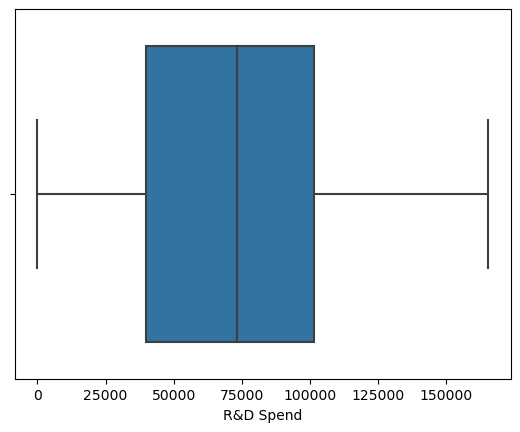

In [125]:
sns.boxplot(x=startup["R&D Spend"])

<Axes: xlabel='Profit'>

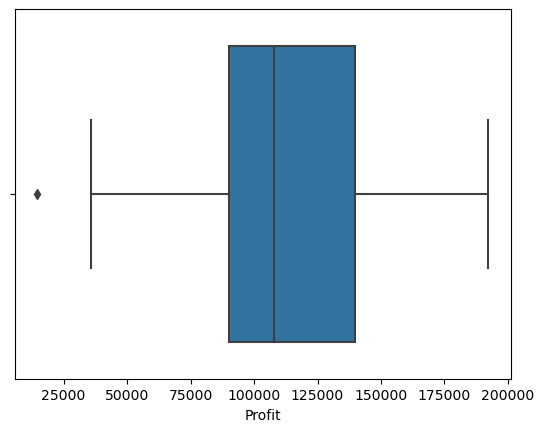

In [126]:
sns.boxplot(x=startup["Profit"])

<Axes: xlabel='Administration'>

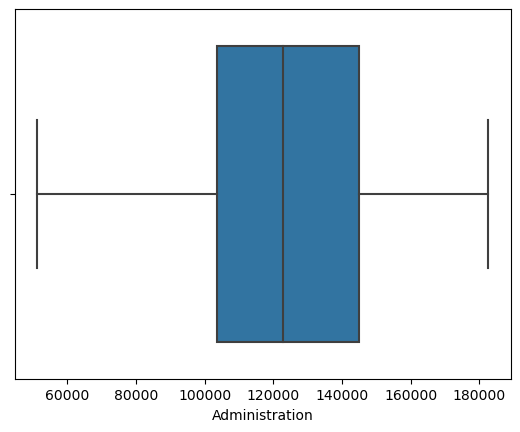

In [127]:
sns.boxplot(x=startup["Administration"])

<Axes: xlabel='Marketing Spend'>

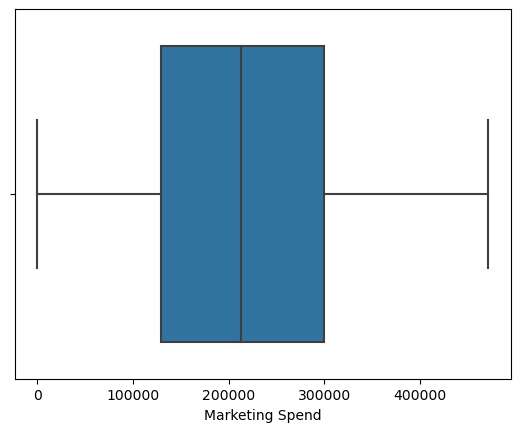

In [128]:
sns.boxplot(x=startup["Marketing Spend"])

In [129]:
## their is no outlier detected in data set as can see directly from the boxplot

In [130]:
startup.duplicated().sum()

0

In [131]:
## their is no duplicate in the data 

In [132]:
final=startup.reindex(["State" , "R&D Spend" , "Administration" , "Marketing Spend" , "Profit"], axis=1)
print(final.head())

        State  R&D Spend  Administration  Marketing Spend     Profit
0    New York  165349.20       136897.80        471784.10  192261.83
1  California  162597.70       151377.59        443898.53  191792.06
2     Florida  153441.51       101145.55        407934.54  191050.39
3    New York  144372.41       118671.85        383199.62  182901.99
4     Florida  142107.34        91391.77        366168.42  166187.94


In [133]:
final.to_csv("cleaned Up Dataset.csv" , index =False)